## EE 502 P: Analytical Methods for Electrical Engineering
    
# Homework 10: Review
## Due 15 December, 2019 at 11:59 PM
### Kevin Egedy

Copyright &copy; 2019, University of Washington

<hr>

**Instructions**: Choose **<u>one</u>** of the following problems. Solve the problem and then write up your solution in a stand alone Jupyter Notebook. Your notebook should have the following elements:

- Problem statement
- Mathematical description of the solution
- Executable code, commented, clear code

You will be graded on how well your notebook reads like a nicely formated, well written report. You must:

- Write mathematical descriptions using complete sentences, paragraphs, and LaTeX formulas. 
- Comment your code as necessary, with a description of what each function does and all major steps.
- Label plots axes, use legends, and use plot titles. 

# Differential Equations for Neural Networks

The computational neural networks we have been studying are quite far from what is happening in biology. A slightly more realistic model is to admit that each neuron $i$ in a network has a time varying firing rate $x_i$, for $i$ equal $1$ to $n$. We let $W \in \mathbb{R}^{n \times n}$ be weight matrix, and $b \in \mathbb{R}^n$. The dynamics of such a neural network are

$$
\dot x_i = g \left (
\sum_{j=1}^n w_{i,j} x_j + b_i
\right )
$$

where is the nonlinearity

$$
g(x) = \frac{1}{1+e^{-x}} - \frac{1}{2} .
$$

*a)* Show through simulation that the matrix 

$$
W = - \begin{pmatrix}
1 & 2 & 0 \\
0 & 1 & 2 \\
2 & 0 & 1
\end{pmatrix}
$$

with $b = 0$ results in oscillations. This is called a ring oscillator. Draw a graph representation of it. Now show through simulation that a ring of $n$ neurons so arranged oscillates when $n$ is odd, but not when it is even.

*b)* Define $W$ and $b$ so that the resulting network is bistable. That is, when one neuron is on in steady state, another is off, and *vice versa*. Simulate the system with different initial conditions. Draw a graph representation of your network.

*c)* Build a network that contains two subnetworks that oscillate, that are connected in such a way that if one subnetwork oscillates, it prevents the other from oscillating, and *vice versa*. Simulate the system with different initial conditions to show the desired behavior. Draw a graph representation of your network.

*d)* Define $W \in \mathbb{R}^{n \times n}$ and $b \in \mathbb{R}^n$ with $n = 50$ to be a random neural network. 

Given a number $p \in [0,1]$, define a random matrix $A$ as follows. For each $i,j$, choose $r \in [0,1]$ randomly. Then put

$$
A_{i,j} = \left \{
\begin{array}{ll}
1 & \mathrm{if} & r \leq \frac{p}{2} \\
-1 & \mathrm{if} & \frac{p}{2} < r \leq p \\
0 & \mathrm{otherwise}.
\end{array}
\right .
$$

Then put 

$$
W = A - I
$$

where $I$ is the identity matrix. Through simulations with $n=20$, explain the various behaviors you can get with various values of $p$. 

<hr>

reference: http://genomics.princeton.edu/rajan/downloads/papers/Rajan2005.pdf

In [1]:
# Imports
import math
import numpy as np
import sympy as sp
from sympy import lambdify
sp.init_printing(use_latex='mathjax')
import matplotlib.pyplot as plt
import networkx as nx
import random
import scipy
import scipy.ndimage
import scipy.integrate as spi
import sys
from mpl_toolkits.mplot3d import Axes3D 
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

The function $g(x)$ describes a nonlinear relationship between the firing rate and current. A plot of $g(x)$ is provided for visualization.

In [2]:
# nonlinearity relationship
def g(x):
    return 1/(1+np.exp(-x))-(1/2)

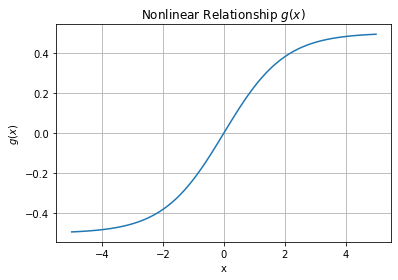

In [3]:
x = np.linspace(-5,5,101)
fix,ax = plt.subplots()
ax.plot(x,g(x))
ax.set_xlabel('x')
ax.set_ylabel('$g(x)$')
ax.set_title('Nonlinear Relationship $g(x)$')
plt.grid(True);

The systems is defined with parameters $n = 3$, $b = 0$ and $t$ from $0$ to $100$. To simulate a realistic model, the initial conditions are chosen such that $X$ is randomized from $[-1,1]$. For reference, setting initial conditions to $X = [-0.65, 0.20, 0.34]$ provides nicely shaped oscillations.

In [4]:
# Dynamics of Neural Network
def firing_rates(init,t,W,b,neurons):
    X = init
    N = int(neurons)
    X_rate = [0]*N
    for i in range(N): 
        s = 0  # sum 
        for j in range(N):
            s += W[i,j]*X[j]
        X_rate[i] = g(s+b[i])  # np.dot(W[i],X) + b[i]
    return X_rate

In [5]:
# neurons
N = 3

# weight matrix
W = -np.array([
    [1,2,0],
    [0,1,2],
    [2,0,1]
])

# bias
b = np.zeros(N)

# time
t = np.linspace(0., 100, 6000)

#  X: presynaptic neuron firing rate
def generate_initial_cond(N):
    return np.random.uniform(-1,1,size=N)

The scipy library is used to calculate the steady state neuron firing rate. The system is visualized in 2D comparing each of the neuron firing rates to each other and against time. 

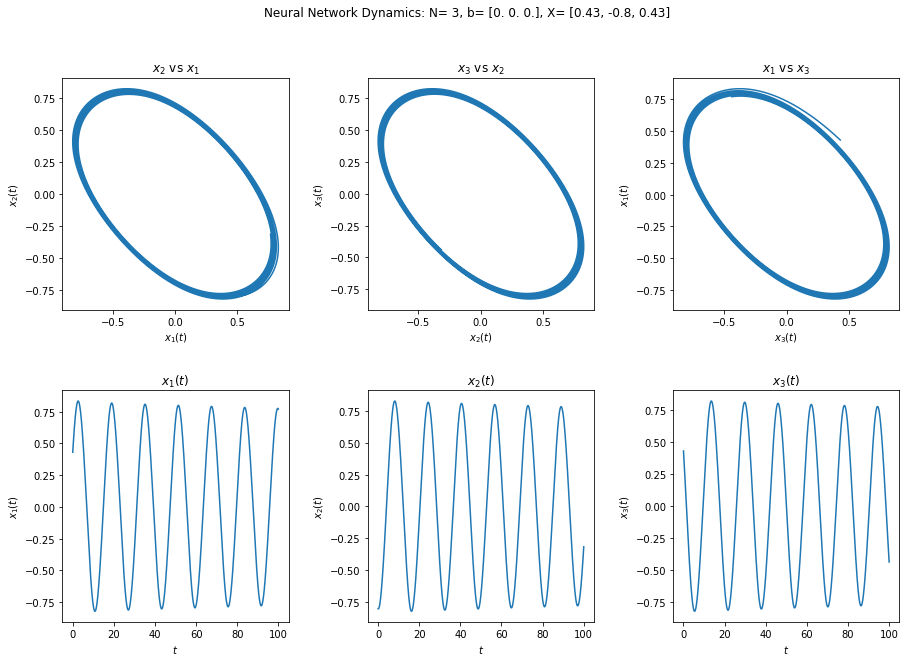

In [6]:
fig,axs = plt.subplots(2,3,figsize=(15,10))
plt.subplots_adjust(hspace=0.35)
plt.subplots_adjust(wspace=0.35)

# Calculate Trajectory
#X = generate_initial_cond(N)
X = [0.43, -0.8, 0.43]  # Conditions for nicely shaped oscillations
trajectory0 = spi.odeint(firing_rates,X,t,args=(W,b,N))
X = [round(x,2) for x in X]  # Format to fit on graph

# Plot neuron vs neuron
axs[0,0].plot(trajectory0[:,0],trajectory0[:,1])
axs[0,0].set_xlabel("$x_1(t)$")
axs[0,0].set_ylabel("$x_2(t)$")
axs[0,0].set_title("$x_2$ vs $x_1$")

axs[0,1].plot(trajectory0[:,1],trajectory0[:,2])
axs[0,1].set_xlabel("$x_2(t)$")
axs[0,1].set_ylabel("$x_3(t)$")
axs[0,1].set_title("$x_3$ vs $x_2$")

axs[0,2].plot(trajectory0[:,2],trajectory0[:,0])
axs[0,2].set_xlabel("$x_3(t)$")
axs[0,2].set_ylabel("$x_1(t)$")
axs[0,2].set_title("$x_1$ vs $x_3$")

# Plot steady state vs t
axs[1,0].plot(t,trajectory0[:,0])
axs[1,0].set_xlabel("$t$")
axs[1,0].set_ylabel("$x_1(t)$")
axs[1,0].set_title("$x_1(t)$")

axs[1,1].plot(t,trajectory0[:,1])
axs[1,1].set_xlabel("$t$")
axs[1,1].set_ylabel("$x_2(t)$")
axs[1,1].set_title("$x_2(t)$")

axs[1,2].plot(t,trajectory0[:,2])
axs[1,2].set_xlabel("$t$")
axs[1,2].set_ylabel("$x_3(t)$")
axs[1,2].set_title("$x_3(t)$")

plt.suptitle(f"Neural Network Dynamics: N= {N}, b= {b}, X= {X}")
plt.show();

As expected with oscillating trajectories, when one neuron's firing rate decreases, another increases which results in circular shapes in the first 3 graphs. Each neuron's firing rate oscillates over time. In the next example, the neuron firing rates are shifted from each other such that no two peaks occur at the exact same time.   

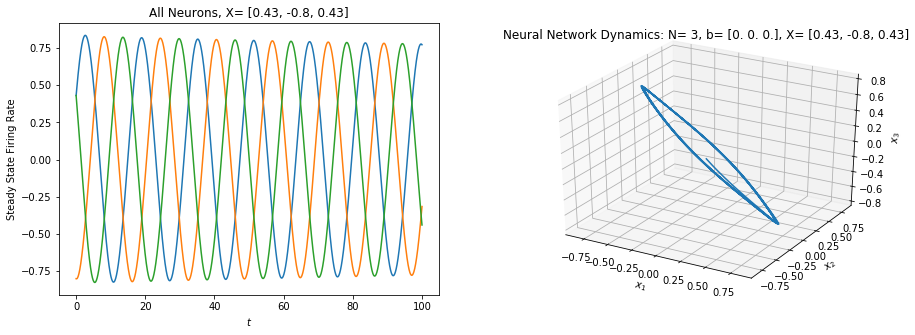

In [7]:
fig = plt.figure(figsize=(15,5))

# Plot t vs trajectory0
ax = fig.add_subplot(1, 2, 1)
ax.plot(t,trajectory0[:,0],label="$x_1$")
ax.plot(t,trajectory0[:,1],label="$x_2$")
ax.plot(t,trajectory0[:,2],label="$x_3$")

# Labels
ax.set_xlabel("$t$")
ax.set_ylabel("Steady State Firing Rate")
ax.set_title(f"All Neurons, X= {X}");

# 3D Plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot(trajectory0[:,0],trajectory0[:,1],trajectory0[:,2])

# Labels
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$x_3$")
ax.set_title(f"Neural Network Dynamics: N= {N}, b= {b}, X= {X}")

plt.show();

To understand the behavior of the system further, let's investigate the stability of the eigenvalues. $W$ is imported into a sympy matrix for easy calculation.

**Eigenvalue structures**

- Real, distinct: $
\begin{cases} \lambda_1,\lambda_2>0 \implies \text{Unstable node}\\ \lambda_1,\lambda_2<0 \implies \text{Stable node}\\ \text{one positive, one negative} \implies \text{Saddle point}\end{cases}$
<br><br>
- Real, repeated: $
\begin{cases} \text{two LI eigenvectors} \implies \text{Singular node (could be stable or not)}\\ \text{one LI eigenvector} \implies \text{Degenerate node (could be stable or not)} \end{cases}$
<br><br>
- Real, one zero eigenvalue: $\begin{cases} \text{marginally stable} \end{cases}$
<br><br>
- Complex: $
\begin{cases} Re(\lambda)<0 \implies  \text{Stable focus (i.e. a sprial going toward the center node)} \\ Re(\lambda)>0 \implies  \text{Unstable focus (i.e. a sprial going away the center node)} \\ Re(\lambda)=0  \implies \text{Center node in which the trajectories are circles/ellipses} \end{cases}$

In [8]:
# Format Eigenvalues
_W = sp.Matrix(W)
eigs = list(_W.eigenvals().keys())
eigs = [complex(eig.evalf()) for eig in eigs]
for i,eig in enumerate(eigs):
    eigs[i] = complex(round(eig.real,2),round(eig.imag,2))

eigs

[(-3+0j), -1.73j, 1.73j]

The eigenvalues are:

$$\begin{eqnarray}
    \lambda_1 & = & -3 \\
    \lambda_2 & = & -1.73j \\
    \lambda_3 & = & 1.73j
\end{eqnarray}$$ 

Since there are real negative eigenvalues and completely imaginary eigenvalues, the system will continue to oscillate at the same bounds for all time (update: there is a very small decay). In the next example, the system is simulated with 2 neurons.

In [9]:
# neurons
N = 2

# weight matrix
W = -np.array([
    [1,2,0],
    [0,1,2],
    [2,0,1]
])

# bias
b = np.zeros(N)

# time
t = np.linspace(0., 100, 6000)

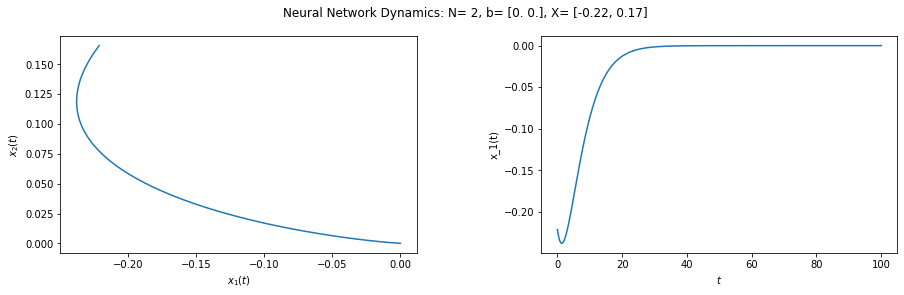

In [10]:
fig,axs = plt.subplots(1,2,figsize=(15,4))
plt.subplots_adjust(hspace=0.35)
plt.subplots_adjust(wspace=0.35)

X = generate_initial_cond(N)
trajectory1 = spi.odeint(firing_rates,X,t,args=(W,b,N))

X = [round(x,2) for x in X]  # Format to fit on graph
axs[0].plot(trajectory1[:,0],trajectory1[:,1])
axs[0].set_xlabel("$x_1(t)$")
axs[0].set_ylabel("$x_2(t)$")

axs[1].plot(t,trajectory1[:,0])
axs[1].set_xlabel("$t$")
axs[1].set_ylabel("x_1(t)")

plt.suptitle(f"Neural Network Dynamics: N= {N}, b= {b}, X= {X}")
plt.show();

Examining the steady states shows there are no oscillations with two neurons. 

<hr>

*b)* Define $W$ and $b$ so that the resulting network is bistable. That is, when one neuron is on in steady state, another is off, and *vice versa*. Simulate the system with different initial conditions. Draw a graph representation of your network.

Following the same pattern of the ring oscillator, variables $j,k,l$ are introduced to the matrix to create a bistable network. The goal is to tune $W$ in order to get the desired behavior. The eigenvalues of the new matrix are plotted to find all possible values. 

The tuning matrix is defined as followed:

$$W = -\begin{bmatrix}
    1+j & 2+k & 0+l \\
    0+l & 1+j & 2+k \\
    2+k & 0+l & 1+j \\
\end{bmatrix}$$    

The eigenvalues of the tuning matrix are:

$$\begin{eqnarray}
    \lambda_1 & = &-j-k-l-3 \\
    \lambda_2 & = & -j+\frac{k}{2}-\frac{\sqrt{3}ik}{2}+\frac{l}{2}+\frac{\sqrt{3}il}{2}-\sqrt{3}i \\
    \lambda_3 & = & -j+\frac{k}{2}+\frac{\sqrt{3}ik}{2}+\frac{l}{2}-\frac{\sqrt{3}il}{2}+\sqrt{3}i
\end{eqnarray}$$ 

In [11]:
# Define A
j,k,l = sp.symbols('j,k,l')
W = -np.array([
    [1+j,2+k,0+l],
    [0+l,1+j,2+k],
    [2+k,0+l,1+j]
])

# Find Eigenvalues
_W = sp.Matrix(W)
eigs = list(_W.eigenvals().keys())
eigs

⎡                     k   √3⋅ⅈ⋅k   l   √3⋅ⅈ⋅l              k   √3⋅ⅈ⋅k   l   √3
⎢-j - k - l - 3, -j + ─ - ────── + ─ + ────── - √3⋅ⅈ, -j + ─ + ────── + ─ - ──
⎣                     2     2      2     2                 2     2      2     

⋅ⅈ⋅l       ⎤
──── + √3⋅ⅈ⎥
2          ⎦

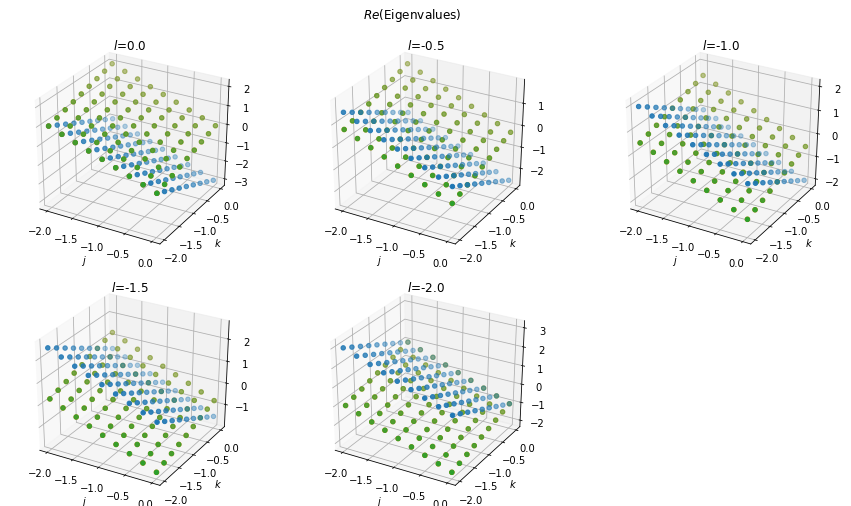

In [12]:
eig0 = lambdify([j,k,l], eigs[0])
eig1 = lambdify([j,k,l], eigs[1])
eig2 = lambdify([j,k,l], eigs[2])

J,K = np.meshgrid(np.linspace(-2, 0, 9),np.linspace(-2, 0, 9))
fig = plt.figure(figsize=(15,8))
plt.subplots_adjust(top=0.925)
plt.subplots_adjust(hspace=0.1)
fig.suptitle('$Re$(Eigenvalues)')

for i,L in enumerate(np.linspace(0,-2,5)):
    ax = fig.add_subplot(2, 3, i+1, projection='3d')
    ax.scatter(J,K,np.real(eig0(J,K,L)))
    ax.scatter(J,K,np.real(eig1(J,K,L)))
    ax.scatter(J,K,np.real(eig2(J,K,L)))
    ax.set_title(f'$l$={L}')
    ax.set_xlabel("$j$")
    ax.set_ylabel("$k$")

plt.show();

The tuning matrix has numerous solutions that result in stable and unstable eigenvalues. It is necessary for all eigenvalues to have a real negative value so that the neurons don't oscillate continuously or without bound. In my investigation, $j$ must be set to a small value to in order for this condition to be true.  A new $W$ matrix is generated by constraining $j,k,l$ to be from $[-2,0]$ and result in stable eigenvalues. In the provided example, there is a 3 by 3 chart such that the bias is varied on the y-axis and the initial condition is varied on the x-axis. 

In [13]:
def generate_stable_weights(N,Jconstraint=None,Kconstraint=None,Lconstraint=None):
    '''
    - Generates a new weight matrix by subsituting random values for j, k, and l.
    - Inputs allow multiple constraints for the system. 
    - If no stable eigenvalues can be found for the given requirements, 
        the function will throw an exception.
    - Note: The current bias can 
        induce spontaneous firing if it is positive 
        or suppress firing if it is negative.
    '''
    W = None
    j,k,l = sp.symbols('j,k,l')
    def W_var():
        return -sp.Matrix([
                    [1+j,2+k,0+l],
                    [0+l,1+j,2+k],
                    [2+k,0+l,1+j]
                ])
    J=random.uniform(-2,0) if Jconstraint == None else float(Jconstraint)
    K=random.uniform(-2,0) if Kconstraint == None else float(Kconstraint)
    L=random.uniform(-2,0) if Lconstraint == None else float(Lconstraint)
    i = 0
    while(1):
        W = W_var().subs({j:J,k:K,l:L})
        eigs = None
        eigs = list(W.eigenvals().keys())
        eigs = np.array([complex(eig.evalf()) for eig in eigs])
        eigs_real = eigs.real
        eigs_stable = eigs_real[eigs_real<=0]
        if eigs_stable.size==N:
            break
        if i>=10000:
            raise Exception(f'No stable eigenvalues for values j = {J}, k = {K}, l = {L}.\
                              Eigenvalues are {eigs}')
        if Jconstraint != None and Kconstraint != None and Lconstraint != None:
            raise Exception(f'No stable eigenvalues for values j = {J}, k = {K}, l = {L}.\
                              Eigenvalues are {eigs}')
        J=random.uniform(-2,0) if Jconstraint == None else float(Jconstraint)
        K=random.uniform(-2,0) if Kconstraint == None else float(Kconstraint)
        L=random.uniform(-2,0) if Lconstraint == None else float(Lconstraint)
        i+=1
    nfunc = lambdify((),W)
    return nfunc()

In [14]:
def plot_bistable_network(W,B):
    '''
    W is the weight matrix
    B is the list of bias 
    '''
    
    # Format Eigenvalues
    _W = sp.Matrix(W)
    eigs = list(_W.eigenvals().keys())
    eigs = [complex(eig.evalf()) for eig in eigs]
    for i,eig in enumerate(eigs):
        eigs[i] = complex(round(eig.real,2),round(eig.imag,2))

    # Stable Plot
    fig = plt.figure(figsize=(15,12))
    plt.subplots_adjust(hspace=0.35)
    plt.subplots_adjust(wspace=0.35)
    plt.suptitle(f"Neural Network Dynamics: N= {N}, Eigs= {eigs}")

    # time
    t = np.linspace(0., 200, 10000)

    # Initial Conditions
    X = [[1,0,0],[0,1,0],[0,0,1]]

    for i in range(len(X)):
        b = [round(b,2) for b in B[i]]

        # Calculate Trajectory0
        trajectory0 = spi.odeint(firing_rates,X[0],t,args=(W,B[i],N))
        x = [round(x,2) for x in X[0]]

        # Plot Trajectory0
        ax = fig.add_subplot(3, 3, 1+3*i)
        ax.plot(t,np.real(trajectory0[:,0]),label="$x_1$")
        ax.plot(t,np.real(trajectory0[:,1]),label="$x_2$")
        ax.plot(t,np.real(trajectory0[:,2]),label="$x_3$")
        ax.set_xlabel("$t$")
        ax.set_ylabel("Steady State Firing Rate")
        ax.set_title(f"b= {b}, X= {x}")

        # Calculate Trajectory1
        trajectory1 = spi.odeint(firing_rates,X[1],t,args=(W,B[i],N))
        x = [round(x,2) for x in X[1]]

        # Plot Trajectory1
        ax = fig.add_subplot(3, 3, 2+3*i)
        ax.plot(t,np.real(trajectory1[:,0]),label="$x_1$")
        ax.plot(t,np.real(trajectory1[:,1]),label="$x_2$")
        ax.plot(t,np.real(trajectory1[:,2]),label="$x_3$")
        ax.set_xlabel("$t$")
        ax.set_ylabel("Steady State Firing Rate")
        ax.set_title(f"b= {b}, X= {x}")

        # Calculate Trajectory2
        trajectory2 = spi.odeint(firing_rates,X[2],t,args=(W,B[i],N))
        x = [round(x,2) for x in X[2]]

        # Plot Trajectory2
        ax = fig.add_subplot(3, 3, 3+3*i)
        ax.plot(t,np.real(trajectory2[:,0]),label="$x_1$")
        ax.plot(t,np.real(trajectory2[:,1]),label="$x_2$")
        ax.plot(t,np.real(trajectory2[:,2]),label="$x_3$")
        ax.set_xlabel("$t$")
        ax.set_ylabel("Steady State Firing Rate")
        ax.set_title(f"b= {b}, X= {x}")

    plt.legend()
    plt.show();

Through experimentation and the eigenvalue plots, I found setting $l=-2$ and $j,k$ to small values creates a bistable system. The steady state value for the "on" neuron is 3 and the "off" neurons are 0. It is important to note, the bias completely determines which neurons are in the "on" state. In order to excite one neuron individually, the bias is set equal to the negative column in the $W$ matrix such that $-W[:,0]$ excites the first neuron, $-W[:,1]$ excites the second neuron, and $-W[:,2]$ excites the third neuron. Furthermore, multipling the bias by a constant determines the final steady state value. In this example, I have chosen the constant to be 3. The initial condition has no effect on the steady state value of the system. 

The resulting weight matrix is 

$$
W = \begin{bmatrix}
    -0.4 & -1.99 &  2 \\
    2  & -0.4 & -1.99 \\
    -1.99 &  2 & -0.4 
\end{bmatrix}$$

The eigenvalues are 

$$\begin{eqnarray}
    \lambda_1 & = & -0.39 \\
    \lambda_2 & = & -0.41-3.46j \\
    \lambda_3 & = & -0.41+3.46j
\end{eqnarray}$$ 

The biases to excite each neuron are

$$
B = -3\begin{bmatrix}
    -0.4 \\
    2 \\
    -1.99 
\end{bmatrix}, 
-3\begin{bmatrix}
    -1.99 \\ 
    -0.4  \\
    2
\end{bmatrix},
-3\begin{bmatrix}
    2 \\ 
    -1.99 \\
    -0.4
\end{bmatrix}
$$


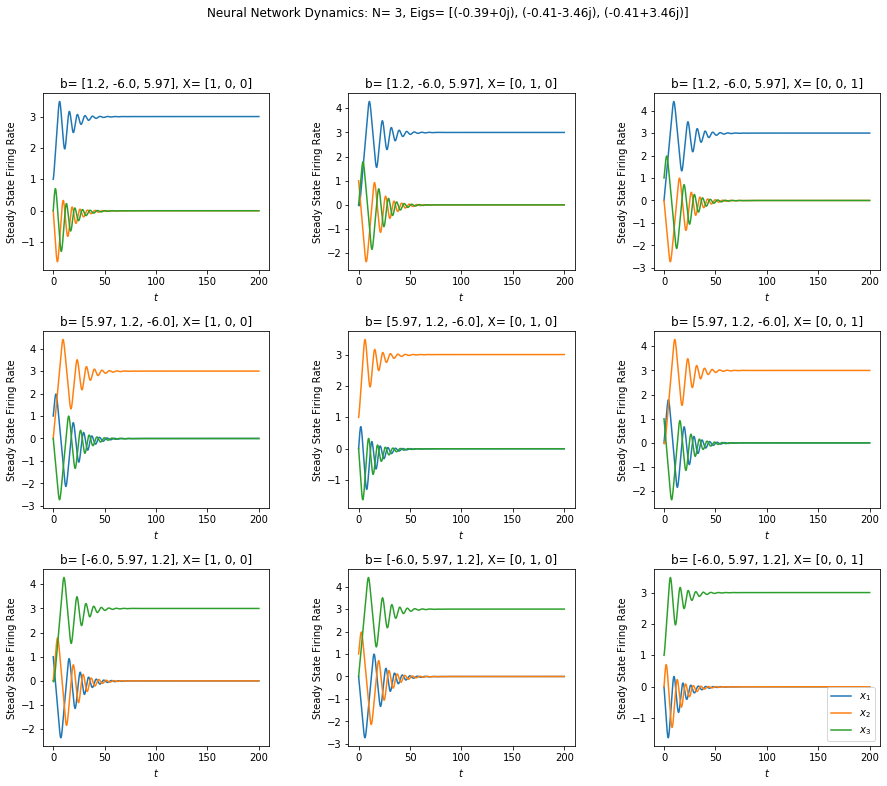

[[-0.4  -1.99  2.  ]
 [ 2.   -0.4  -1.99]
 [-1.99  2.   -0.4 ]]


In [15]:
N = 3
# W = generate_stable_weights(N)
W = generate_stable_weights(N,-.6,-.01,-2)
B = [-3*W[:,0],-3*W[:,1],-3*W[:,2]]
plot_bistable_network(W,B)
print(W)

Another bistable system occurs at very small values for $j,k$ and $l$. The real part of the complex eigenvalues are less  than the previous example which result in a slower decay for the oscillations. In this example $j=-0.08, k=-0.22,$ and $l=-0.09$.

The resulting weight matrix is 

$$W = \begin{bmatrix}
    -0.92 & -1.78 &  0.09 \\
    0.09 & -0.92 & -1.78 \\
    -1.78 &  0.09 & -0.92
\end{bmatrix}$$   

The eigenvalues are 

$$\begin{eqnarray}
    \lambda_1 & = & -2.61 \\
    \lambda_2 & = & -0.07-1.62j \\
    \lambda_3 & = & -0.07+1.62j
\end{eqnarray}$$ 

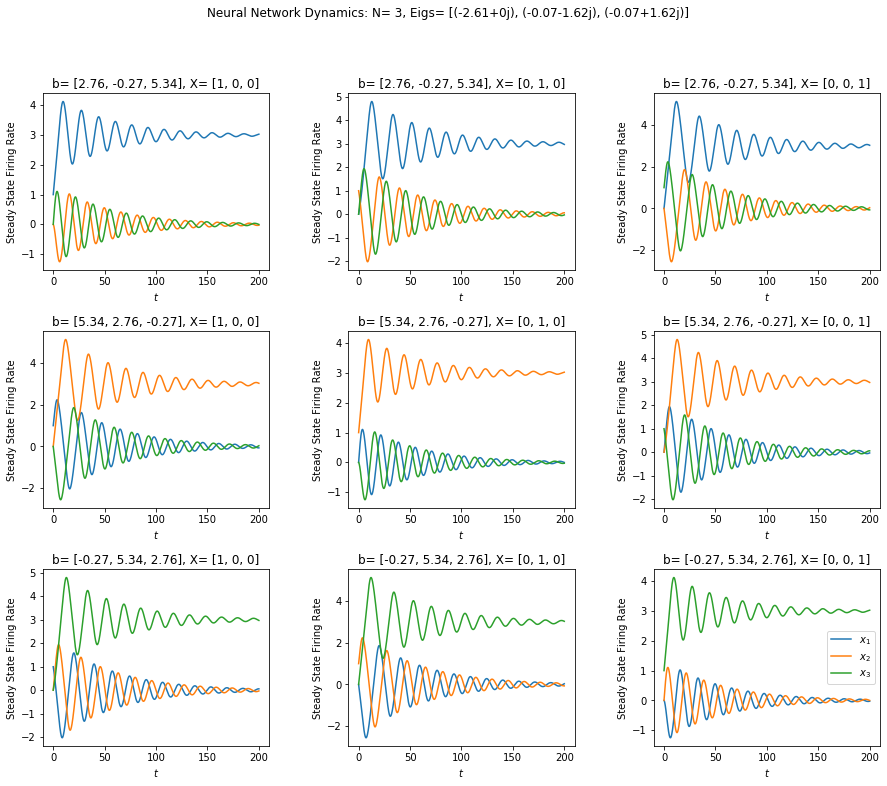

[[-0.92 -1.78  0.09]
 [ 0.09 -0.92 -1.78]
 [-1.78  0.09 -0.92]]


In [16]:
N = 3
W = generate_stable_weights(N,-0.08,-0.22,-0.09)
B = [-3*W[:,0],-3*W[:,1],-3*W[:,2]]
plot_bistable_network(W,B)
print(W)

For fun, I plotted the 3D phase portrait of the bistable weight matrix. The system is stable and so the steady state spirals inwards to the final value.

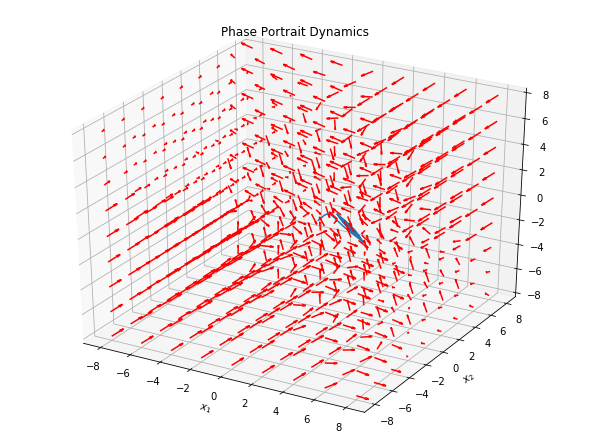

In [17]:
# Meshgrid
N = 3
b = B[0]
r1,r2,r3 = np.meshgrid(np.linspace(-8, 8, 9),np.linspace(-8, 8, 9),np.linspace(-8, 8, 9))
u,v,w = np.zeros(r1.shape),np.zeros(r2.shape),np.zeros(r3.shape)

# Firing Rates
for i in range(len(r1)):
    for j in range(len(r1)):
        for k in range(len(r1)):
            rdot = firing_rates([r1[i,j,k],r2[i,j,k],r3[i,j,k]],0,W,b,N)
            u[i,j,k] = rdot[0]
            v[i,j,k] = rdot[1]
            w[i,j,k] = rdot[2]


x = [1,0,0]
t = np.linspace(0., 200, 10000)
trajectory0 = spi.odeint(firing_rates,x,t,args=(W,b,N))

# Phase Portrait
fig, ax = plt.subplots(figsize=(8,6))
ax = Axes3D(fig)

# Plot
ax.plot(trajectory0[:,0],trajectory0[:,1],trajectory0[:,2])
ax.quiver(r1,r2,r3,u,v,w,color='r')

# Labels
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Phase Portrait Dynamics')
  
plt.show();

<hr>

*c)* Build a network that contains two subnetworks that oscillate, that are connected in such a way that if one subnetwork oscillates, it prevents the other from oscillating, and *vice versa*. Simulate the system with different initial conditions to show the desired behavior. Draw a graph representation of your network.

A variety of graphing tools are used to understand the behavior of the network. I use the help of a Markov Process to visualize a network with two oscillating subnetworks. The `networks_dynamics` function returns the steady state matrix of the network that can be easily visualized with a grey-scale color map. Let's begin.

In [18]:
def network_dynamics(n, Q, p0):
    '''
    Assumes n is the numer of steps
            Q is the update matrix
            p0 is the starting distribution.
    Returns a matrix of trajectories.
    '''
    # Define trajectory
    trajectory = [p0]
    
    # Probability vector p at every time step
    p = p0
    for _ in range(n):
        p = p.dot(Q)
        trajectory.append(p)
    
    # Numpy Matrix
    trajectory = np.matrix(trajectory).T

    return trajectory

In [19]:
def generate_network_weights(subnetworkN=3):
    N = subnetworkN
    p = random.uniform(0,0.01)
    zeros = np.zeros((N,N))
    #sub0 = generate_stable_weights(N)
    #sub1 = generate_stable_weights(N)
    sub0 = sub1 = -np.array([
    [1,2,0],
    [0,1,2],
    [2,0,1]
    ])
    network = np.append(
        np.append(sub0,zeros,1),
        np.append(zeros,sub1,1), 0
    )
    network[N-1,N] = -p 
    network[N,N-1] = -p 
    return network

The oscillating ring network from part A will be used for each subnetwork. First, I plot the Markov Process to understand the generic shape of the subnetwork. To create a network with two oscillating subnetworks, a small probability is made between them such that subnetwork_0 can move to subnetwork_1 and vice versa. In general, the excited subnetwork will oscillate as normal, however there is a small chance it can leave and join the other subnetwork. By creating favorable conditions, a subnetwork can prevent the other from oscillating. Note, the Markov Process graphs do not show self resonance.  (I could not find an easy way to do this).

In [20]:
Q0 = -np.array([
        [1,2,0],
        [0,1,2],
        [2,0,1]
    ])
Q1 = generate_network_weights()
b = np.zeros(6)
t = np.linspace(0., 300, 6000)

/home/kegedy/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/kegedy/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


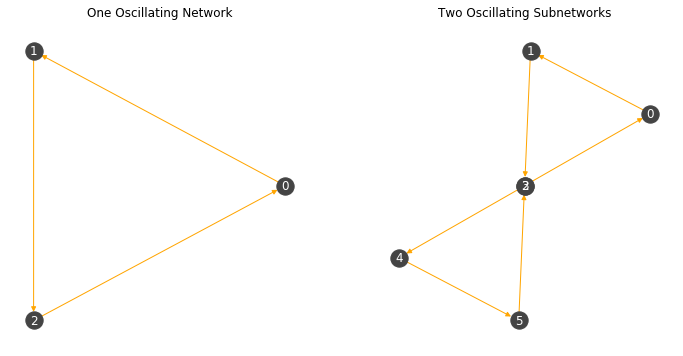

In [21]:
# Network Graphs
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 2, 1)

# Plot One Oscillating Network
G = nx.from_numpy_array(abs(Q0),create_using=nx.DiGraph)
nx.draw(G, 
        pos=nx.kamada_kawai_layout(G), 
        ax=ax,
        with_labels=True, 
        node_color='#444444',
        font_color="white",
        edge_color = "orange",
        width = 1)
ax.set_title(f"One Oscillating Network")

# Plot Two Oscillating Subnetworks
ax = fig.add_subplot(1, 2, 2)
G = nx.from_numpy_array(abs(Q1),create_using=nx.DiGraph)
nx.draw(G, 
        pos=nx.kamada_kawai_layout(G), 
        ax=ax,
        with_labels=True, 
        node_color='#444444',
        font_color="white",
        edge_color = "orange",
        width = 1)
ax.set_title(f"Two Oscillating Subnetworks")

plt.show();

Observe the distance between nodes 2 and 3. They are almost on top of each other meaning there is very little probability that the nodes will move back and forth. In the next example, the trajectories of the system will be plotted over time with different initial conditions.

The values of the network containing two oscillating subnetworks are:

$$
\begin{bmatrix}
-1&         -2&          0&          0&          0&          0\\ 
0&         -1&         -2&          0&          0&          0\\ 
-2&          0&         -1&         -0.00944561&  0&          0\\
0&          0&         -0.00944561& -1&         -2&          0\\
0&          0&          0&          0&         -1&         -2\\
0&          0&          0&         -2&          0&         -1 
\end{bmatrix}
$$

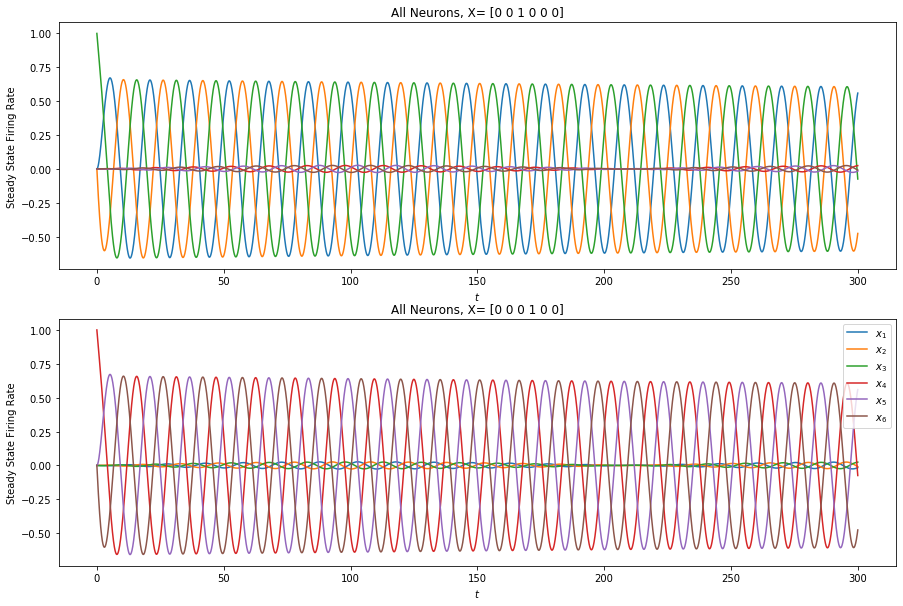

In [22]:
fig = plt.figure(figsize=(15,10))

# Calculate Trajectory with Initial Conditions in Subnetwork 0
X = np.array([0,0,1,0,0,0])
trajectory0 = spi.odeint(firing_rates,X,t,args=(Q1,b,6))

# Plot trajectory0 vs t
ax = fig.add_subplot(2, 1, 1)
ax.plot(t,trajectory0[:,0],label="$x_1$")
ax.plot(t,trajectory0[:,1],label="$x_2$")
ax.plot(t,trajectory0[:,2],label="$x_3$")
ax.plot(t,trajectory0[:,3],label="$x_1$")
ax.plot(t,trajectory0[:,4],label="$x_2$")
ax.plot(t,trajectory0[:,5],label="$x_3$")

# Labels
ax.set_xlabel("$t$")
ax.set_ylabel("Steady State Firing Rate")
ax.set_title(f"All Neurons, X= {X}");

# Calculate Trajectory with Initial Conditions in Subnetwork 1
X = np.array([0,0,0,1,0,0])
trajectory1 = spi.odeint(firing_rates,X,t,args=(Q1,b,6))

# Plot trajectory1 vs t
ax = fig.add_subplot(2, 1, 2)
ax.plot(t,trajectory1[:,0],label="$x_1$")
ax.plot(t,trajectory1[:,1],label="$x_2$")
ax.plot(t,trajectory1[:,2],label="$x_3$")
ax.plot(t,trajectory1[:,3],label="$x_4$")
ax.plot(t,trajectory1[:,4],label="$x_5$")
ax.plot(t,trajectory1[:,5],label="$x_6$")

# Labels
ax.set_xlabel("$t$")
ax.set_ylabel("Steady State Firing Rate")
ax.set_title(f"All Neurons, X= {X}")

plt.legend()
plt.show();

The desired network behavior is achieved.  Exciting any of the neurons in subnetwork_0 causes that system to oscillate, meanwhile the other subnetwork remains mostly inactive. Likewise, exciting any of the neurons in subnetwork_1 causes that system to oscillate and leaves subnetwork_0 inactive. Note, small oscillations can be observed in the inactive subnetwork. This is due to the small probability connecting the networks together.

Using the `networks_dynamics` function and a grey-scale map we can observe the same outcome. The grey in the inactive subnetwork is the small variations we saw from before. In the last few time steps, the active subnetwork is shown all white and all black which translates to the system oscillating.

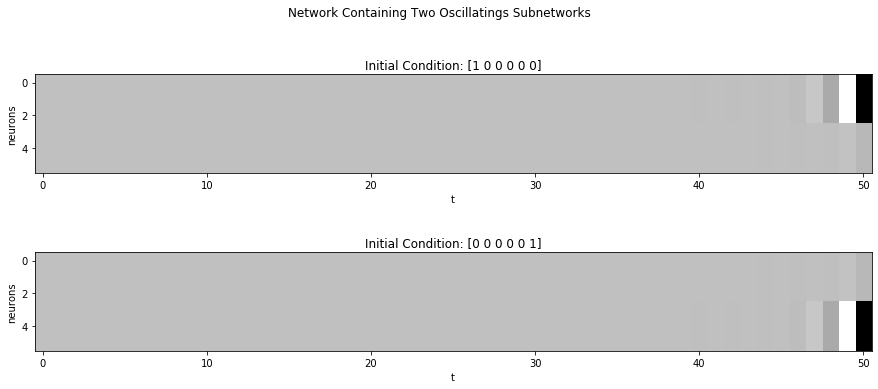

In [23]:
# Trajectory A
p0 = np.array([1,0,0,0,0,0])
trajectoryA = network_dynamics(50,Q1,p0)

# Trajectory B
p1 = np.array([0,0,0,0,0,1])
trajectoryB = network_dynamics(50,Q1,p1)

# Plot
fig,axs = plt.subplots(2,1,figsize=(15,6))
plt.suptitle('Network Containing Two Oscillatings Subnetworks')

axs[0].imshow(trajectoryA,cmap="gray_r")
axs[0].set_xlabel("t")
axs[0].set_ylabel("neurons")
axs[0].set_title(f'Initial Condition: {p0}')

axs[1].imshow(trajectoryB,cmap="gray_r")
axs[1].set_xlabel("t")
axs[1].set_ylabel("neurons")
axs[1].set_title(f'Initial Condition: {p1}');

<hr>

*d)* Define $W \in \mathbb{R}^{n \times n}$ and $b \in \mathbb{R}^n$ with $n = 50$ to be a random neural network. 

Given a number $p \in [0,1]$, define a random matrix $A$ as follows. For each $i,j$, choose $r \in [0,1]$ randomly. Then put

$$
A_{i,j} = \left \{
\begin{array}{ll}
1 & \mathrm{if} & r \leq \frac{p}{2} \\
-1 & \mathrm{if} & \frac{p}{2} < r \leq p \\
0 & \mathrm{otherwise}.
\end{array}
\right .
$$

Then put 

$$
W = A - I
$$

where $I$ is the identity matrix. Through simulations with $n=20$, explain the various behaviors you can get with various values of $p$. 


The randomized matrix $A$ is implemented using numpy's `vectorize` function.  I simulate the random neural network with $p = [0,0.025,0.05,0.075,0.01,0.1,0.2,0.3,1]$. 

In [24]:
N = 50
W = [] # list of weights used to plot neural network

# Dynamics of Matrix A
def switch (p):
    r = random.uniform(0,1)
    if r<= p/2:
        return 1
    elif p/2<r and r<=p:
        return -1
    else:
        return 0
vectorized_func = np.vectorize(switch)

In [25]:
def plot_random_neural_network(p,N):
    # Initialize
    #b = np.random.uniform(-1,1,size=N)
    b = np.zeros(N)
    I = np.identity(N)
    t = np.linspace(0., 50, 6000)
    X = np.random.uniform(-.1,.1,20) # simulations with n = 20
    
    A = np.zeros((N,N),dtype=float)
    A[:,:] = p
    A = vectorized_func(A)
    W = np.add(A,-I)
    trajectory = spi.odeint(firing_rates,X,t,args=(W,b,20))

    # Figure Size
    fig = plt.figure(figsize=(15,5))
    ax = fig.add_subplot(1, 1, 1)

    # Plot
    for j in range(20):
        ax.plot(t,trajectory[:,j])

    # Labels
    ax.set_xlabel("$t$")
    ax.set_ylabel("Steady State Firing Rate")
    ax.set_title(f'p = {p}')
    plt.show()
    return W

In [26]:
def graph_from_numpy(W,figsize):
    G = nx.from_numpy_array(W)

    fig,ax = plt.subplots(1,1,figsize=figsize)
    nx.draw(G, 
            #pos=nx.kamada_kawai_layout(G), 
            ax=ax,
            with_labels=True, 
            node_color='#444444',
            font_color="white",
            edge_color = "orange",
            width = 0.5)
    ax.set_title(f"Graph Representation for Random Neural Walk");

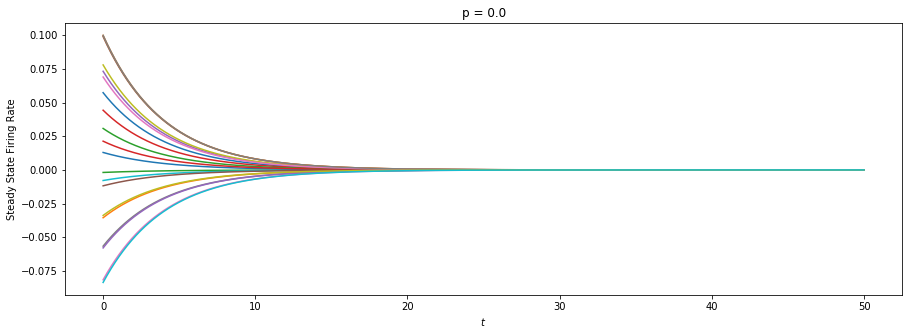

In [27]:
p = 0.0
W.append( plot_random_neural_network(p,N) )

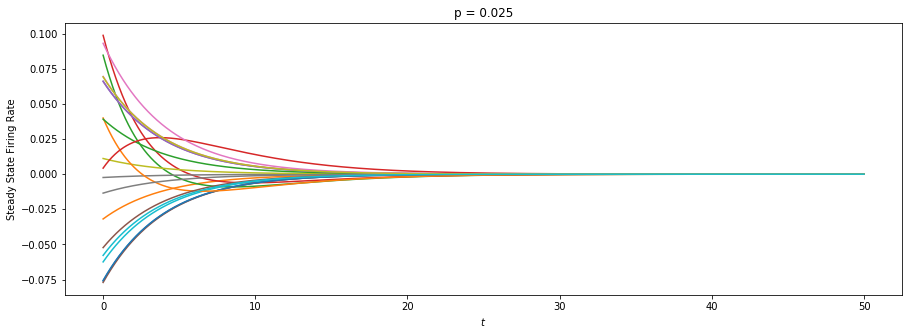

In [28]:
p = 0.025
W.append( plot_random_neural_network(p,N) )

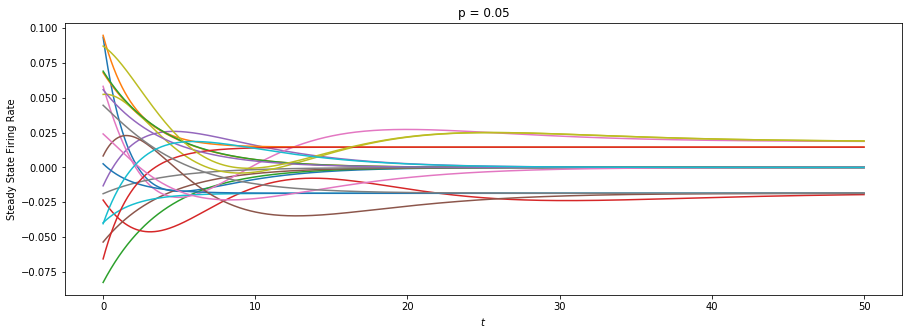

In [29]:
p = 0.05
W.append( plot_random_neural_network(p,N) )

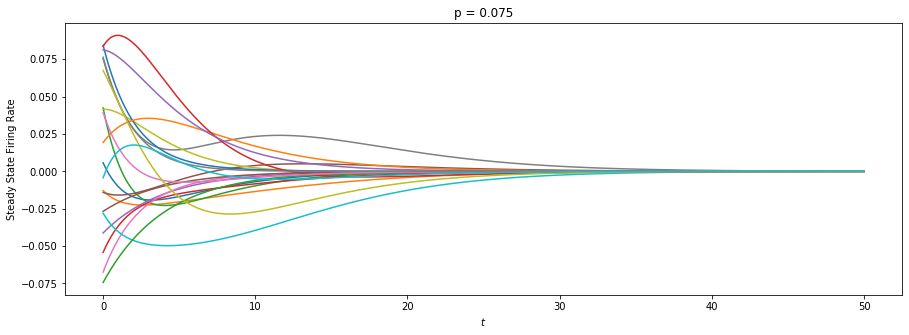

In [30]:
p = 0.075
W.append( plot_random_neural_network(p,N) )

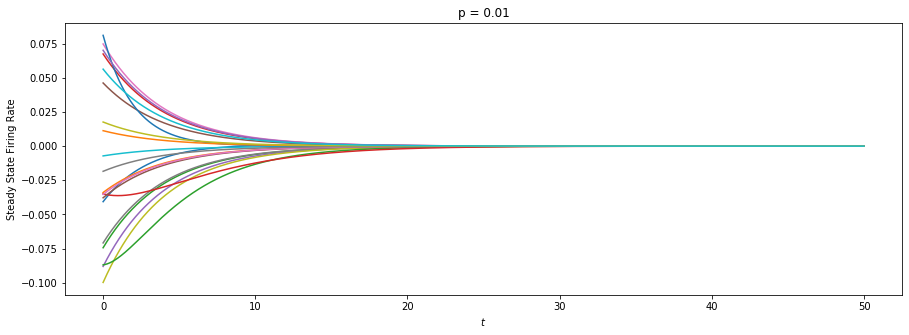

In [31]:
p = 0.01
W.append( plot_random_neural_network(p,N) )

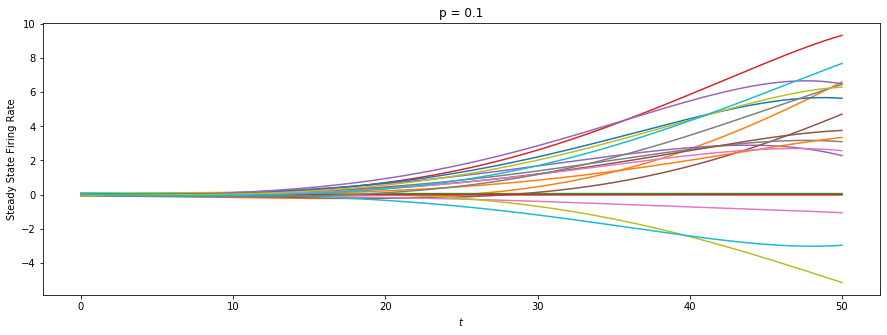

In [32]:
p = 0.1
W.append( plot_random_neural_network(p,N) )

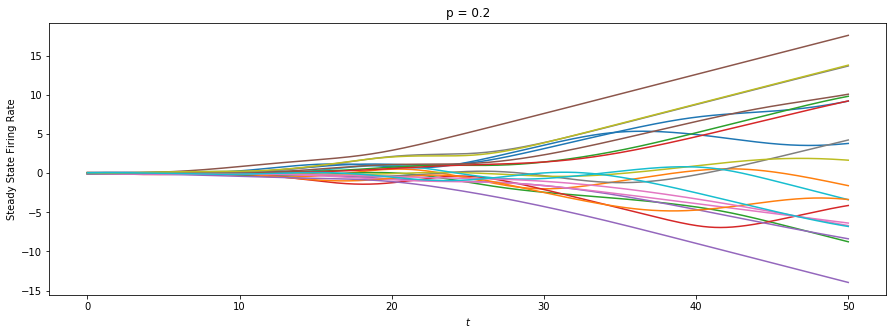

In [33]:
p = 0.2
W.append( plot_random_neural_network(p,N) )

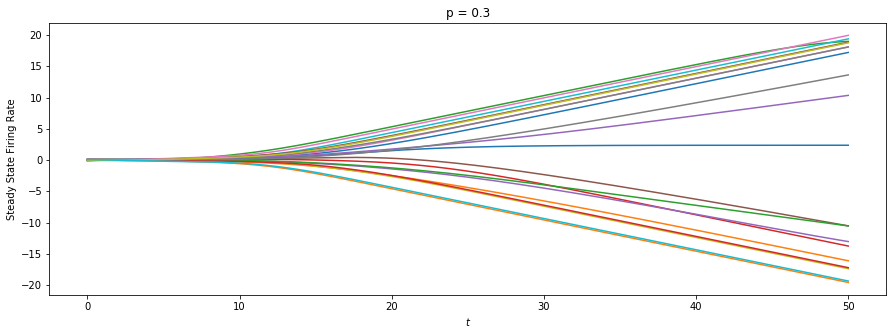

In [34]:
p = 0.3
W.append( plot_random_neural_network(p,N) )

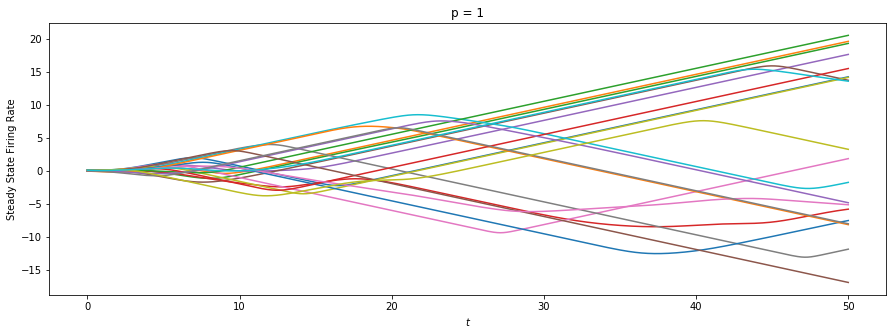

In [35]:
p = 1
W.append( plot_random_neural_network(p,N) )

240

1247

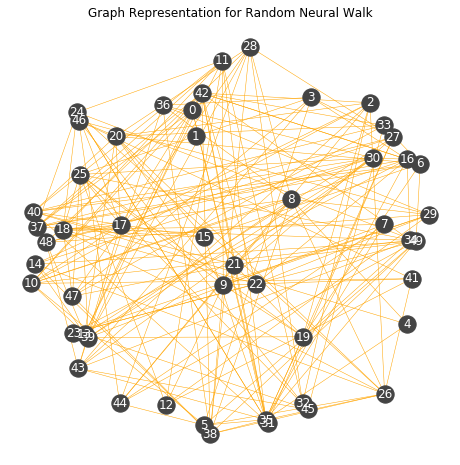

In [36]:
graph_from_numpy(W[3],(8,8))
G = nx.from_numpy_array(W[3])
G.number_of_edges()

G = nx.from_numpy_array(W[-1])
G.number_of_edges()

It is observed that random neural networks can exhibit many different behaviors. A lot of randomness is seen when p is very small. For example, when $p=0.075$ the steady states move in many directions. This results from the limited number connections between the neurons. The number of connections at $p=0.075$ is around $212$, compared to the total number of edges with $p=1$ is approximately $1250$. As the network grows in connections, the steady states begin to converge towards a positive or negative direction based on the bias.  